# Application of the alchemical free energy library "alchemlyb"

* Documentation can be found here: https://alchemlyb.readthedocs.io/en/latest/index.html
* Code on GitHub: https://github.com/alchemistry/alchemlyb
* Considered use case: decoupling of an electric neutral solute from a solution. 
* Here, a sequential perturbation of non-bonded interactions (dispersion only) with a total of 9 $\lambda$-points (l = [0,...,8]) is considered. 
* GROMACS dhdl-files are located in the folder "dhdl_files". 

In [4]:
#LOAD SOME MODULES 
#!alchemlyb needs to be installed!
import pandas as pd
import glob
from alchemlyb.parsing.gmx import extract_dHdl
from alchemlyb.estimators import TI
from alchemlyb.parsing.gmx import extract_u_nk
from alchemlyb.estimators import BAR, MBAR

In [5]:
#PARAMETERS
Temp = 300.0 #Absolute temperature [K]
RT = 8.314e-3*Temp #Thermal energy [kJ/mol]
lam_vdw_start = 0 #Lambda-point where VDW perturbation starts

In [6]:
#READ IN dhdl-FILES
filelist = glob.glob("dhdl_files/dhdl*.xvg")
filelist.sort()
filelist

['dhdl_files/dhdl.0.xvg',
 'dhdl_files/dhdl.1.xvg',
 'dhdl_files/dhdl.2.xvg',
 'dhdl_files/dhdl.3.xvg',
 'dhdl_files/dhdl.4.xvg',
 'dhdl_files/dhdl.5.xvg',
 'dhdl_files/dhdl.6.xvg',
 'dhdl_files/dhdl.7.xvg',
 'dhdl_files/dhdl.8.xvg']

# Free energy estimation using the BAR estimator

In [7]:
#ALL LAMBDA POINTS
u_nk = pd.concat([extract_u_nk(xvg, T=Temp) for xvg in filelist])

In [9]:
bar = BAR()
bar.fit(u_nk)
#print(RT*bar.d_delta_f_)
DG_tot_BAR = RT*bar.delta_f_[(0.0, 1.0, 0.0)][0]
err_DG_tot_BAR = RT*bar.d_delta_f_[(0.0, 1.0, 0.0)][0]
print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_BAR, err_DG_tot_BAR))

DG_tot = -15.363 +/-   nan kJ/mol


# Free energy estimation using the TI estimator

In [10]:
#ALL LAMBDA POINTS
data_dHdl = pd.concat([extract_dHdl(xvg, T=Temp) for xvg in filelist])

In [11]:
ti = TI()
ti.fit(data_dHdl)
ti.delta_f_

,"(0.0, 0.0, 0.0)","(0.0, 0.1, 0.0)","(0.0, 0.3, 0.0)","(0.0, 0.4, 0.0)","(0.0, 0.5, 0.0)","(0.0, 0.68, 0.0)","(0.0, 0.72, 0.0)","(0.0, 0.76, 0.0)","(0.0, 1.0, 0.0)"
"(0.0, 0.0, 0.0)",0.000000,0.418116,0.975612,1.050925,0.838725,-1.876644,-2.934094,-3.914948,-6.583854
"(0.0, 0.1, 0.0)",-0.418116,0.000000,0.557496,0.632810,0.420609,-2.294760,-3.352210,-4.333063,-7.001970
"(0.0, 0.3, 0.0)",-0.975612,-0.557496,0.000000,0.075313,-0.136887,-2.852256,-3.909706,-4.890560,-7.559466
"(0.0, 0.4, 0.0)",-1.050925,-0.632810,-0.075313,0.000000,-0.212200,-2.927569,-3.985019,-4.965873,-7.634779
"(0.0, 0.5, 0.0)",-0.838725,-0.420609,0.136887,0.212200,0.000000,-2.715369,-3.772819,-4.753673,-7.422579
"(0.0, 0.68, 0.0)",1.876644,2.294760,2.852256,2.927569,2.715369,0.000000,-1.057450,-2.038304,-4.707210
"(0.0, 0.72, 0.0)",2.934094,3.352210,3.909706,3.985019,3.772819,1.057450,0.000000,-0.980854,-3.649760
"(0.0, 0.76, 0.0)",3.914948,4.333063,4.890560,4.965873,4.753673,2.038304,0.980854,0.000000,-2.668906
"(0.0, 1.0, 0.0)",6.583854,7.001970,7.559466,7.634779,7.422579,4.707210,3.649760,2.668906,0.000000


In [12]:
#!dHdl-gradients are given in multiples of RT -> multiply by RT!
#print(RT*ti.delta_f_)
DG_tot_TI = RT*ti.delta_f_[(0.0, 1.0, 0.0)][0]
err_DG_tot_TI = RT*ti.d_delta_f_[(0.0, 1.0, 0.0)][0]

print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_TI, err_DG_tot_TI))

DG_tot = -16.421 +/- 0.358 kJ/mol


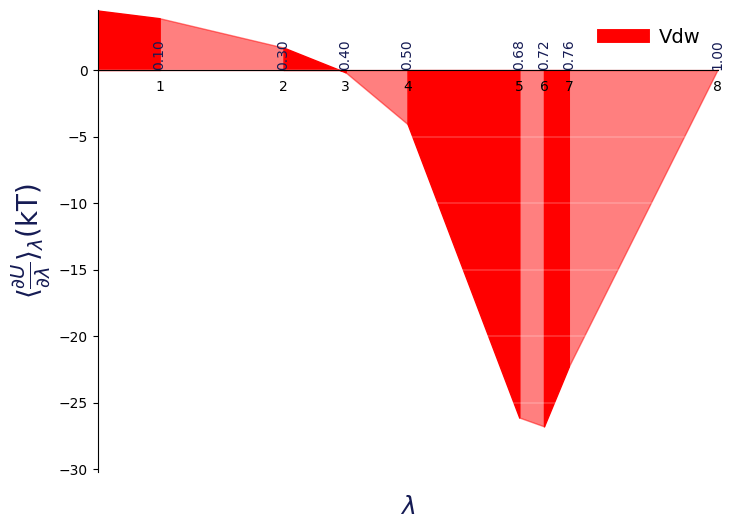

In [13]:
# dHdl plot
from alchemlyb.visualisation import plot_ti_dhdl
ax = plot_ti_dhdl(ti)
ax.figure.savefig('dhdl_TI.pdf', bbox_inches='tight')

# Free energy estimation using the MBAR estimator

In [14]:
#ALL LAMBDA POINTS
u_nk = pd.concat([extract_u_nk(xvg, T=Temp) for xvg in filelist])

In [15]:
mbar = MBAR()
mbar.fit(u_nk)
#print(RT*mbar.d_delta_f_)
DG_tot_MBAR = RT*mbar.delta_f_[(0.0, 1.0, 0.0)][0]
err_DG_tot_MBAR = RT*mbar.d_delta_f_[(0.0, 1.0, 0.0)][0]

print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_MBAR, err_DG_tot_MBAR))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


DG_tot = -15.610 +/- 0.380 kJ/mol


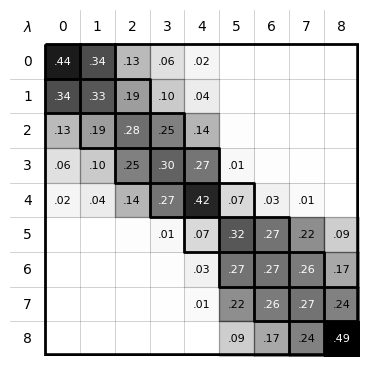

In [16]:
#PLOTTING OVERLAP MATRIX
from alchemlyb.visualisation import plot_mbar_overlap_matrix
ax = plot_mbar_overlap_matrix(mbar.overlap_matrix)
ax.figure.savefig('O_MBAR.pdf', bbox_inches='tight', pad_inches=0.0)

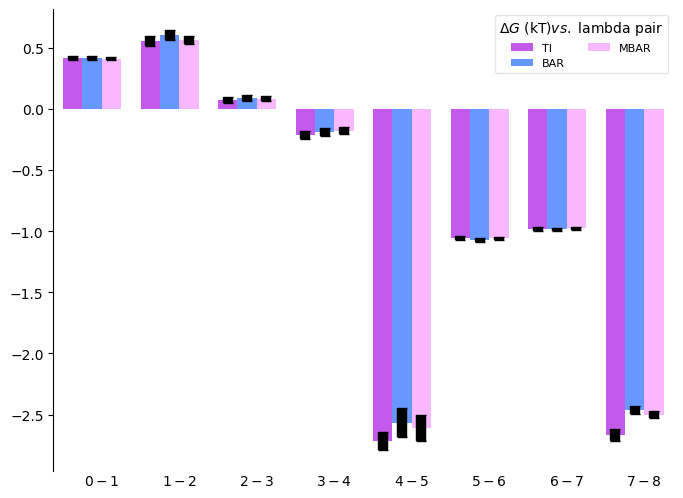

In [17]:
#plot df states
from alchemlyb.visualisation.dF_state import plot_dF_state
estimators = [(ti),(bar),(mbar)]
fig = plot_dF_state(estimators, orientation='portrait')
fig.savefig('dF_state.pdf', bbox_inches='tight')

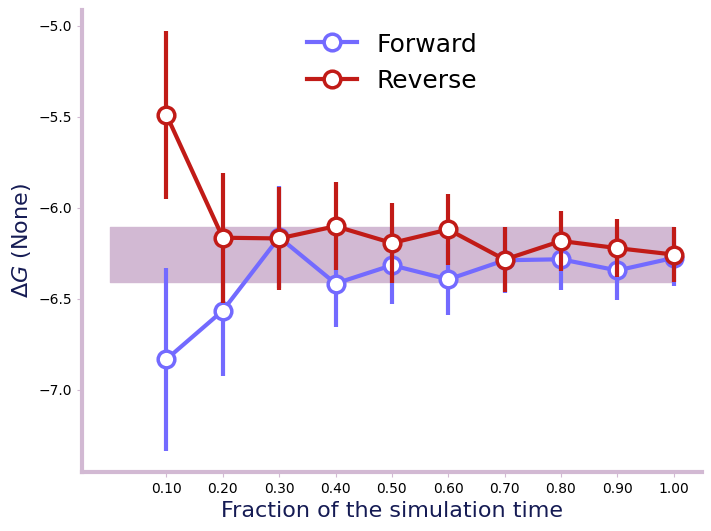

In [18]:
from alchemlyb.visualisation import plot_convergence
from alchemlyb.convergence import forward_backward_convergence
data_list = [extract_u_nk(xvg, T=Temp) for xvg in filelist]
df = forward_backward_convergence(data_list, 'mbar')
ax = plot_convergence(df)
ax.figure.savefig('dF_t.pdf')